<a href="https://colab.research.google.com/github/YuvrajHajari/AI-camera-proctoring/blob/main/Krutanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Use unicode_escape encoding to avoid errors with special characters in the CSV
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

# View the first 5 rows to make sure it loaded correctly
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
# 1. Drop the unused/extra columns identified in the PDF
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

# 2. Check for null values
df.isnull().sum()

# 3. Drop null values (usually found in the Amount column)
df.dropna(inplace=True)

# 4. Convert Amount to integer so we can do math on it
df['Amount'] = df['Amount'].astype('int')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


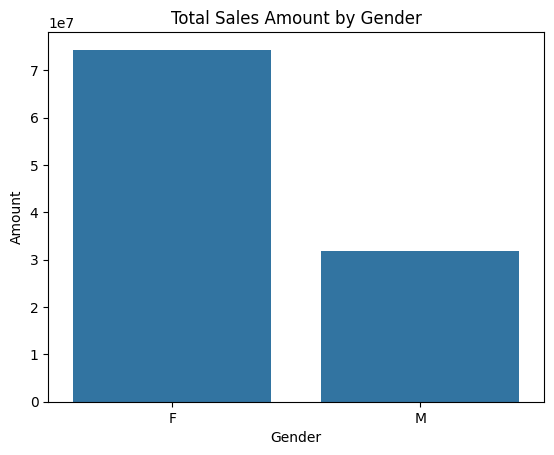

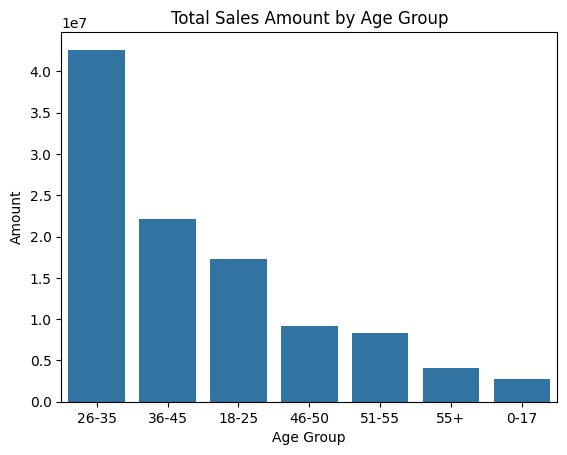

In [5]:
# 1. Sales by Gender
# Grouping by Gender and summing the Amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender', y= 'Amount' ,data = sales_gen)
plt.title('Total Sales Amount by Gender')
plt.show()

# 2. Sales by Age Group
# Highlighting which age category spends the most
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group', y= 'Amount' ,data = sales_age)
plt.title('Total Sales Amount by Age Group')
plt.show()

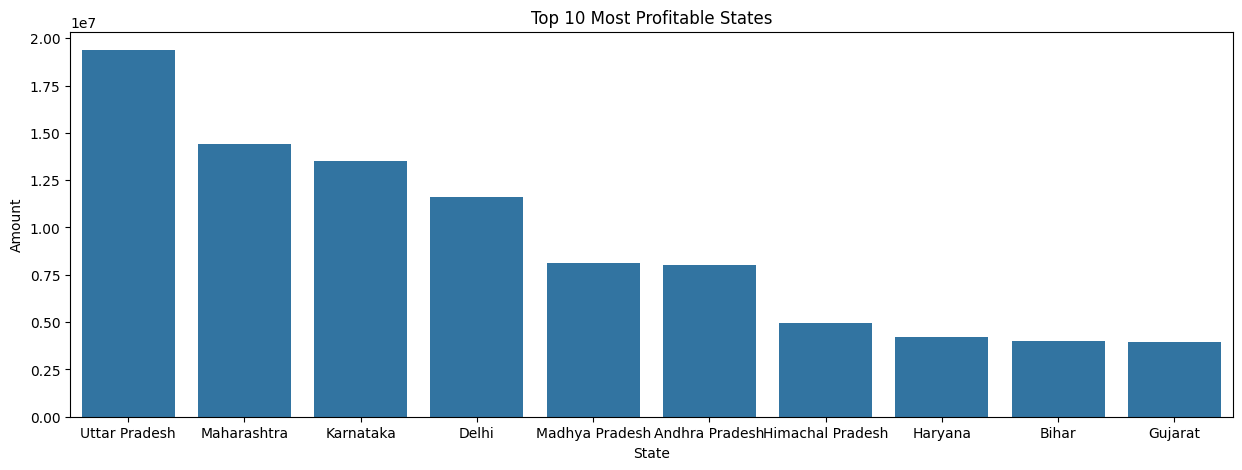

In [6]:
# Top 10 States by Amount
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(15,5))
sns.barplot(data = sales_state, x = 'State', y= 'Amount')
plt.title('Top 10 Most Profitable States')
plt.show()

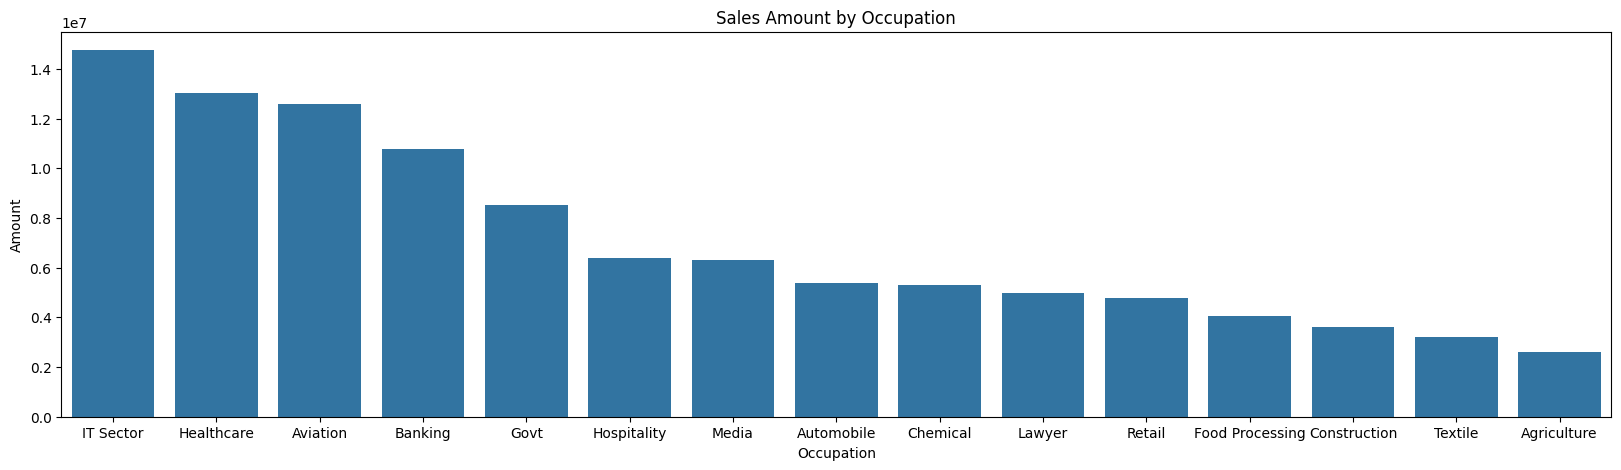

In [7]:
# Sales by Occupation
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(20,5))
sns.barplot(data = sales_occ, x = 'Occupation', y= 'Amount')
plt.title('Sales Amount by Occupation')
plt.show()

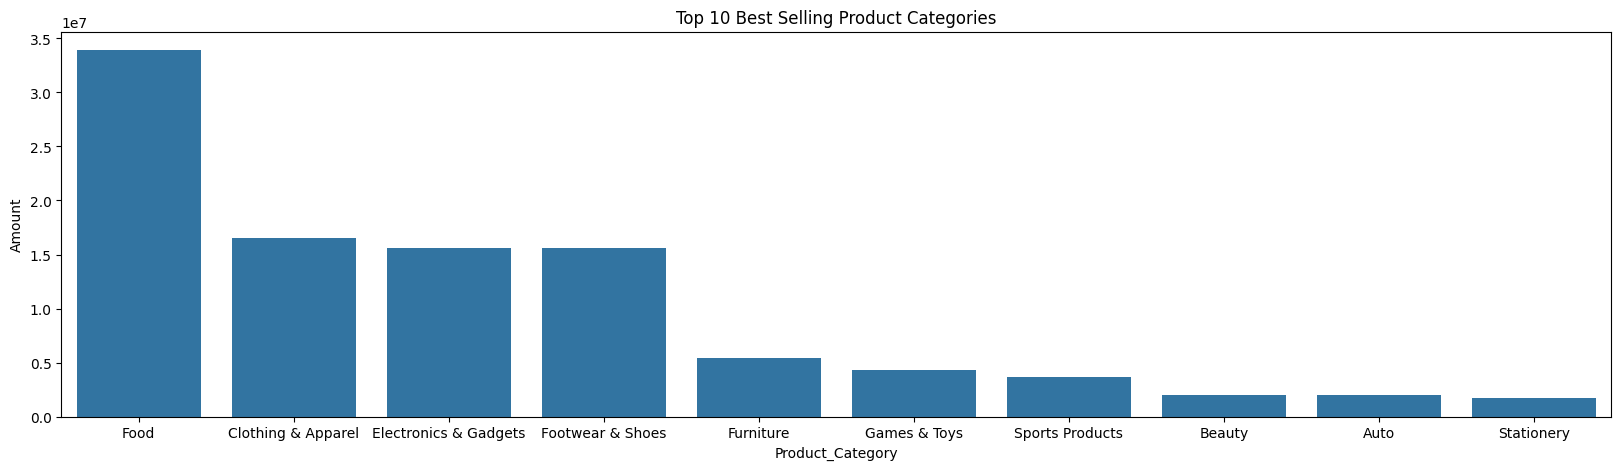

In [8]:
# Top 10 Product Categories by Amount
sales_cat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

plt.figure(figsize=(20,5))
sns.barplot(data = sales_cat, x = 'Product_Category', y= 'Amount')
plt.title('Top 10 Best Selling Product Categories')
plt.show()

Project Conclusion & Insights:

Primary Target: The analysis reveals that the most profitable customers are Married Women aged 26-35 years.

Regional Focus: Marketing efforts should be concentrated in Uttar Pradesh, Maharashtra, and Karnataka.

Professional Targeting: High-spending customers typically work in the IT, Healthcare, and Aviation sectors.

Product Strategy: Campaigns should prioritize Food, Clothing, and Electronics categories to maximize festive revenue.